In [1]:
import json
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
with open('data/training/0a938d79.json') as json_file:
    data = json.load(json_file)

In [32]:
int_to_rgb_dict = {int:PIL.ImageColor.getrgb(int_to_hex[int]) for int in int_to_hex}

In [182]:
def int_to_rgb(int):
    int_to_hex = {
    0: "#000000",  # black
    1: "#0074D9",  # blue
    2: "#FF4136",  # red
    3: "#2ECC40",  # green
    4: "#FFDC00",  # yellow
    5: "#AAAAAA",  # grey
    6: "#F012BE",  # fuschia
    7: "#FF851B",  # orange
    8: "#7FDBFF",  # teal
    9: "#870C25",  # brown
}
    return list(PIL.ImageColor.getrgb(int_to_hex[int]))

In [292]:
data_array = np.array(data['train'][0]['input'])

In [301]:
padded_array = np.pad(data_array, ((0, 20), (0, 5)), constant_values=6)
padded_array.shape

(30, 30)

In [302]:
padded_array = np.pad(data_array, ((0, 0), (0, 0)), constant_values=6)
padded_array.shape

(10, 25)

In [244]:
def create_image_array(data):
    return np.array([[int_to_rgb(element) for element in row] for row in data], dtype=np.uint8)

In [298]:
padded_image_array = create_image_array(padded_array)

In [245]:
image_array = create_image_array(data['train'][0]['input'])

In [280]:
image_array.shape

(10, 25, 3)

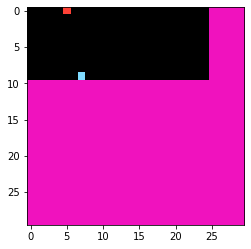

In [300]:
plt.imshow(padded_image_array, interpolation='nearest')

In [283]:
image = Image.fromarray(image_array, 'RGB')

In [303]:
padded_image = Image.fromarray(padded_image_array, 'RGB')

In [305]:
image.size

(25, 10)

In [304]:
padded_image.size

(30, 30)

In [286]:
image.getpixel((4,0))

(0, 0, 0)

In [277]:
image.show()

In [320]:
padded_image = padded_image.resize((3000, 3000), resample=Image.Resampling.NEAREST)

In [321]:
image = image.resize((2500, 1000), resample=Image.Resampling.NEAREST)

In [322]:
padded_image.save('padded_grid.png')

In [323]:
image.save('grid.png')